# Lab 06-1 Softmax Classification Eager


### 기본 Library 선언 및 Tensorflow 버전 확인

In [1]:
import tensorflow as tf
import numpy as np

print(tf.__version__)

tf.random.set_seed(777)  # for reproducibility

2.13.0


## @Multinomial classfication (다항 분류)
- 해당 데이터가 True/False인지 분류하는 이진 분류와는 달리, 해당 데이터가 A,B,C 등 여러 class 중 어디에 속하는지 분류하는 것이 다항 분류이다.
\begin{equation}
\begin{pmatrix}
w_{A1} & w_{A2} & w_{A3} \\
w_{B1} & w_{B2} & w_{B3} \\
w_{C1} & w_{C2} & w_{C3}
\end{pmatrix}
\cdot
\begin{pmatrix}
x_1 \\
x_2 \\
x_3
\end{pmatrix}
=
\begin{pmatrix}
w_{A1}x_1 & w_{A2}x_2 & w_{A3}x_3 \\
w_{B1}x_1 & w_{B2}x_2 & w_{B3}x_3 \\
w_{C1}x_1 & w_{C2}x_2 & w_{C3}x_3
\end{pmatrix}
=
\begin{pmatrix}
\bar{y}_A \\
\bar{y}_B \\
\bar{y}_C
\end{pmatrix}
\end{equation}
와 같은 꼴로 다항 분류 식을 작성할 수 있으며, 이때 y값(score)을 소프트맥스 함수를 사용하여 변환한다 (이진 분류에선 시그모이드 함수를 사용).<br>
소프트맥스 함수는 다음과 같으며, 모든 y값을 확률로 반환하며 이때 나오는 확률의 합이 1이 되도록 만들어준다.
\begin{equation}
S(y_i) = {e^{y_i} \over \displaystyle \sum_je^{y_j}}
\end{equation}
이 떄, $i=1,2$이고 $y_2=0$이면 위 소프트맥스 함수는
\begin{equation}
S(y_i) = {1 \over 1+ e^{y_1}}\quad(i=1,2)
\end{equation}
와 같은 형태로 변환할 수 있으며, 이는 이진 분류에서 사용한 시그모이드 함수와 동일하다.<br>
즉, 소프트맥스 함수는 시그모이드 함수를 포함하는 개념으로 볼 수 있다.<br>
소프트맥스 함수로 변환된 값들은 다음과 같이 One hot encoding(OHE)을 통해 0과 1의 값으로 변환하며, 그 결과로 어디 class에 속하는지를 예측한다.
\begin{equation}
OHE(
\begin{pmatrix}
S(y_1) \\
S(y_2) \\
S(y_3)
\end{pmatrix}
)=OHE(
\begin{pmatrix}
0.7 \\
0.2 \\
0.1
\end{pmatrix}
)=
\begin{pmatrix}
1.0 \\
0.0 \\
0.0
\end{pmatrix}
\end{equation}

## @다항 분류의 Cross-entropy Cost function
다항 분류의 Cost function은 Cross-entropy Cost function이라고도 하며, 식은 다음과 같다.
\begin{equation}
D(S,L)= \displaystyle -\sum_iL_i\log(S_i)
\end{equation}
\begin{equation}
L_i=OHE(S(y_i))
\end{equation}
특히, training set이 여러 개일 경우 다음과 같은 식을 사용한다.
\begin{equation}
TotalLoss = \displaystyle {1 \over N}\sum_iD(S(WX_i+b),L) \qquad i=1,...,N
\end{equation}

In [5]:
x_data = [[1, 2, 1, 1],
          [2, 1, 3, 2],
          [3, 1, 3, 4],
          [4, 1, 5, 5],
          [1, 7, 5, 5],
          [1, 2, 5, 6],
          [1, 6, 6, 6],
          [1, 7, 7, 7]]
y_data = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]

#convert into numpy and float format
x_data = np.asarray(x_data, dtype=np.float32)
y_data = np.asarray(y_data, dtype=np.float32)

In [6]:
#dataset을 선언합니다.
# dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data))
# dataset = dataset.repeat().batch(2)

nb_classes = 3 #class의 개수입니다.

print(x_data.shape)
print(y_data.shape)

(8, 4)
(8, 3)


In [7]:
#Weight and bias setting
W = tf.Variable(tf.random.normal((4, nb_classes)), name='weight')
b = tf.Variable(tf.random.normal((nb_classes,)), name='bias')
variables = [W, b]

print(W,b)

<tf.Variable 'weight:0' shape=(4, 3) dtype=float32, numpy=
array([[ 0.7706481 ,  0.37335402, -0.05576323],
       [ 0.00358377, -0.5898363 ,  1.5702795 ],
       [ 0.2460895 , -0.09918973,  1.4418385 ],
       [ 0.3200988 ,  0.526784  , -0.7703731 ]], dtype=float32)> <tf.Variable 'bias:0' shape=(3,) dtype=float32, numpy=array([-1.3080608 , -0.13253094,  0.5513761 ], dtype=float32)>


In [8]:
# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
def hypothesis(X):
    return tf.nn.softmax(tf.matmul(X, W) + b)

print(hypothesis(x_data))

tf.Tensor(
[[1.3657196e-02 7.9016238e-03 9.7844124e-01]
 [3.9259814e-02 1.7034756e-02 9.4370544e-01]
 [3.8038525e-01 1.6772322e-01 4.5189154e-01]
 [3.2339048e-01 5.9075940e-02 6.1753362e-01]
 [3.6299739e-06 6.2072729e-08 9.9999630e-01]
 [2.6252046e-02 1.0727973e-02 9.6301997e-01]
 [1.5652511e-05 4.2180275e-07 9.9998391e-01]
 [2.9407774e-06 3.8113402e-08 9.9999702e-01]], shape=(8, 3), dtype=float32)


In [9]:
# Softmax onehot test
sample_db = [[8,2,1,4]]
sample_db = np.asarray(sample_db, dtype=np.float32)

print(hypothesis(sample_db))

tf.Tensor([[0.9302204  0.06200533 0.00777428]], shape=(1, 3), dtype=float32)


In [10]:
def cost_fn(X, Y):
    logits = hypothesis(X)
    cost = -tf.reduce_sum(Y * tf.math.log(logits), axis=1)
    cost_mean = tf.reduce_mean(cost)
    
    return cost_mean

print(cost_fn(x_data, y_data))

tf.Tensor(6.07932, shape=(), dtype=float32)


In [11]:
x = tf.constant(3.0)
with tf.GradientTape() as g:
    g.watch(x)
    y = x * x # x^2
dy_dx = g.gradient(y, x) # Will compute to 6.0
print(dy_dx)

tf.Tensor(6.0, shape=(), dtype=float32)


In [12]:
def grad_fn(X, Y):
    with tf.GradientTape() as tape:
        loss = cost_fn(X, Y)
        grads = tape.gradient(loss, variables)

        return grads

print(grad_fn(x_data, y_data))

[<tf.Tensor: shape=(4, 3), dtype=float32, numpy=
array([[ 0.06914611, -0.6509784 ,  0.5818323 ],
       [-1.5221257 , -1.214863  ,  2.7369888 ],
       [-1.2473828 , -1.7611002 ,  3.008483  ],
       [-1.2014606 , -1.865923  ,  3.0673838 ]], dtype=float32)>, <tf.Tensor: shape=(3,), dtype=float32, numpy=array([-0.15212911, -0.342192  ,  0.4943211 ], dtype=float32)>]


In [13]:
def fit(X, Y, epochs=2000, verbose=100):
    optimizer =  tf.keras.optimizers.SGD(learning_rate=0.1)

    for i in range(epochs):
        grads = grad_fn(X, Y)
        optimizer.apply_gradients(zip(grads, variables))
        if (i==0) | ((i+1)%verbose==0):
            print('Loss at epoch %d: %f' %(i+1, cost_fn(X, Y).numpy()))
            
fit(x_data, y_data)

Loss at epoch 1: 2.849417
Loss at epoch 100: 0.684151
Loss at epoch 200: 0.613813
Loss at epoch 300: 0.558204
Loss at epoch 400: 0.508305
Loss at epoch 500: 0.461058
Loss at epoch 600: 0.415071
Loss at epoch 700: 0.369636
Loss at epoch 800: 0.324533
Loss at epoch 900: 0.280720
Loss at epoch 1000: 0.246752
Loss at epoch 1100: 0.232798
Loss at epoch 1200: 0.221645
Loss at epoch 1300: 0.211476
Loss at epoch 1400: 0.202164
Loss at epoch 1500: 0.193606
Loss at epoch 1600: 0.185714
Loss at epoch 1700: 0.178415
Loss at epoch 1800: 0.171645
Loss at epoch 1900: 0.165350
Loss at epoch 2000: 0.159483


## Prediction Check

In [14]:
sample_data = [[2,1,3,2]] # answer_label [[0,0,1]]
sample_data = np.asarray(sample_data, dtype=np.float32)

a = hypothesis(sample_data)

print(a)
print(tf.argmax(a, 1)) #index: 2

tf.Tensor([[0.00112886 0.08154669 0.9173244 ]], shape=(1, 3), dtype=float32)
tf.Tensor([2], shape=(1,), dtype=int64)


In [15]:
b = hypothesis(x_data)
print(b)
print(tf.argmax(b, 1))
print(tf.argmax(y_data, 1)) # matches with y_data

tf.Tensor(
[[2.1975954e-06 1.2331181e-03 9.9876475e-01]
 [1.1288562e-03 8.1546687e-02 9.1732442e-01]
 [2.2205509e-07 1.6418649e-01 8.3581328e-01]
 [6.3921570e-06 8.5045439e-01 1.4953929e-01]
 [2.6150808e-01 7.2644734e-01 1.2044546e-02]
 [1.3783270e-01 8.6213988e-01 2.7417498e-05]
 [7.4242157e-01 2.5754139e-01 3.6978487e-05]
 [9.2197573e-01 7.8023776e-02 6.0005601e-07]], shape=(8, 3), dtype=float32)
tf.Tensor([2 2 2 1 1 1 0 0], shape=(8,), dtype=int64)
tf.Tensor([2 2 2 1 1 1 0 0], shape=(8,), dtype=int64)


## Convert as Class

In [16]:
class softmax_classifer(tf.keras.Model):
    def __init__(self, nb_classes):
        super(softmax_classifer, self).__init__()
        self.W = tf.Variable(tf.random.normal((4, nb_classes)), name='weight')
        self.b = tf.Variable(tf.random.normal((nb_classes,)), name='bias')
        
    def softmax_regression(self, X):
        return tf.nn.softmax(tf.matmul(X, self.W) + self.b)
    
    def cost_fn(self, X, Y):
        logits = self.softmax_regression(X)
        cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.math.log(logits), axis=1))        
        return cost
    
    def grad_fn(self, X, Y):
        with tf.GradientTape() as tape:
            cost = self.cost_fn(x_data, y_data)
            grads = tape.gradient(cost, self.variables)            
            return grads
    
    def fit(self, X, Y, epochs=2000, verbose=500):
        optimizer =  tf.keras.optimizers.SGD(learning_rate=0.1)

        for i in range(epochs):
            grads = self.grad_fn(X, Y)
            optimizer.apply_gradients(zip(grads, self.variables))
            if (i==0) | ((i+1)%verbose==0):
                print('Loss at epoch %d: %f' %(i+1, self.cost_fn(X, Y).numpy()))
            
model = softmax_classifer(nb_classes)
model.fit(x_data, y_data)

Loss at epoch 1: 2.472669
Loss at epoch 500: 0.375229
Loss at epoch 1000: 0.229923
Loss at epoch 1500: 0.182148
Loss at epoch 2000: 0.150633


# Lab 06 Softmax Zoo_classifier-eager

In [18]:
xy = np.loadtxt('data-04-zoo.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, -1]

nb_classes = 7  # 0 ~ 6

# Make Y data as onehot shape
Y_one_hot = tf.one_hot(y_data.astype(np.int32), nb_classes)

print(x_data.shape, Y_one_hot.shape)

(101, 16) (101, 7)


In [19]:
#Weight and bias setting
W = tf.Variable(tf.random.normal((16, nb_classes)), name='weight')
b = tf.Variable(tf.random.normal((nb_classes,)), name='bias')
variables = [W, b]

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
def logit_fn(X):
    return tf.matmul(X, W) + b

def hypothesis(X):
    return tf.nn.softmax(logit_fn(X))

def cost_fn(X, Y):
    logits = logit_fn(X)
    cost_i = tf.keras.losses.categorical_crossentropy(y_true=Y, y_pred=logits, 
                                                      from_logits=True)    
    cost = tf.reduce_mean(cost_i)    
    return cost

def grad_fn(X, Y):
    with tf.GradientTape() as tape:
        loss = cost_fn(X, Y)
        grads = tape.gradient(loss, variables)
        return grads
    
def prediction(X, Y):
    pred = tf.argmax(hypothesis(X), 1)
    correct_prediction = tf.equal(pred, tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    return accuracy

In [20]:
def fit(X, Y, epochs=1000, verbose=100):
    optimizer =  tf.keras.optimizers.SGD(learning_rate=0.1)

    for i in range(epochs):
        grads = grad_fn(X, Y)
        optimizer.apply_gradients(zip(grads, variables))
        if (i==0) | ((i+1)%verbose==0):
#             print('Loss at epoch %d: %f' %(i+1, cost_fn(X, Y).numpy()))
            acc = prediction(X, Y).numpy()
            loss = cost_fn(X, Y).numpy() 
            print('Steps: {} Loss: {}, Acc: {}'.format(i+1, loss, acc))

fit(x_data, Y_one_hot)

Steps: 1 Loss: 6.631802558898926, Acc: 0.10891088843345642
Steps: 100 Loss: 0.572661817073822, Acc: 0.8514851331710815
Steps: 200 Loss: 0.38972237706184387, Acc: 0.9009901285171509
Steps: 300 Loss: 0.3014775514602661, Acc: 0.9108911156654358
Steps: 400 Loss: 0.24435144662857056, Acc: 0.9306930899620056
Steps: 500 Loss: 0.20434372127056122, Acc: 0.9405940771102905
Steps: 600 Loss: 0.17501817643642426, Acc: 0.9702970385551453
Steps: 700 Loss: 0.15277515351772308, Acc: 0.9900990128517151
Steps: 800 Loss: 0.13542766869068146, Acc: 0.9900990128517151
Steps: 900 Loss: 0.12156666815280914, Acc: 0.9900990128517151
Steps: 1000 Loss: 0.11025161296129227, Acc: 0.9900990128517151


# lab 07 1 learning_rate_and_evaluation - Eager execution
* Learning Rate와 Evaluation에 대한 설명

In [24]:
import matplotlib.pyplot as plt

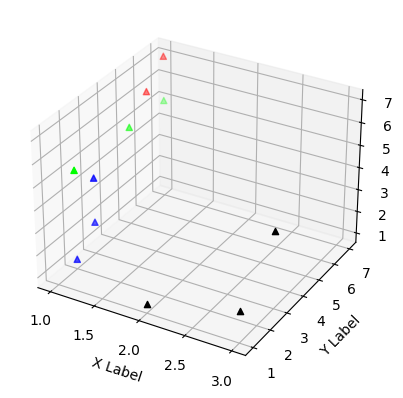

In [25]:
x_train = [[1, 2, 1],
          [1, 3, 2],
          [1, 3, 4],
          [1, 5, 5],
          [1, 7, 5],
          [1, 2, 5],
          [1, 6, 6],
          [1, 7, 7]]

y_train = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]

# Evaluation our model using this test dataset
x_test = [[2, 1, 1],
          [3, 1, 2],
          [3, 3, 4]]
y_test = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1]]


x1 = [x[0] for x in x_train]
x2 = [x[1] for x in x_train]
x3 = [x[2] for x in x_train]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, x3, c=y_train, marker='^')

ax.scatter(x_test[0][0], x_test[0][1], x_test[0][2], c="black", marker='^')
ax.scatter(x_test[1][0], x_test[1][1], x_test[1][2], c="black", marker='^')
ax.scatter(x_test[2][0], x_test[2][1], x_test[2][2], c="black", marker='^')


ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

##  Tensorflow Eager
* Tensorflow data API를 통해 학습시킬 값들을 담는다 (Batch Size는 한번에 학습시킬 Size로 정한다)
* features,labels는 실재 학습에 쓰일 Data (연산을 위해 Type를 맞춰준다)

In [26]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train))#.repeat()

* W와 b은 학습을 통해 생성되는 모델에 쓰이는 Wegith와 Bias (초기값을 variable : 0이나 Random값으로 가능 tf.random_normal([3, 3],tf.zeros([3,3]) )

In [27]:
W = tf.Variable(tf.random.normal((3, 3)))
b = tf.Variable(tf.random.normal((3,)))

* Softmax를 통해 가장 높은 값을 구한다 (0~1사이의 값 합계는 1)

In [28]:
def softmax_fn(features):
    hypothesis = tf.nn.softmax(tf.matmul(features, W) + b)
    return hypothesis

In [29]:
def loss_fn(hypothesis, features, labels):
    cost = tf.reduce_mean(-tf.reduce_sum(labels * tf.math.log(hypothesis), axis=1))
    return cost

### @Learning Rate Decay
- 기존의 Learning Rate가 높은 경우 loss 값을 빠르게 내릴 수는 있지만, 최적의 Cost를 찾지 못할 수 있고
- 낮은 경우 최적의 Cost를 찾을 확률이 높지만 최적화 시간이 오래 걸린다.
- 또한, 고정된 learning rate에선 Gradient descent를 적용하여 Cost를 줄이는 정도에는 한계가 있다.
- 따라서, 최초 learning rate를 높게 설정한 뒤, 특정 시점(epoch)마다 learning rate를 조정함으로써 최초 learning rate로 얻은 cost보다 더 낮은 cost를 얻을 수 있도록 한다.
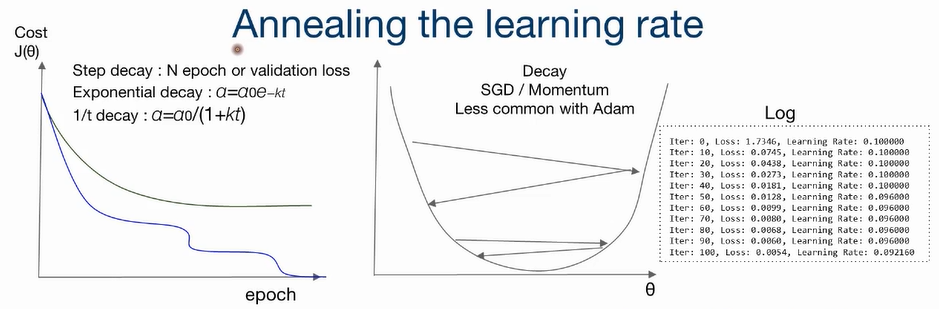

### Learning Rate 값을 조정하기 위한 Learning Decay 설정 
#### 5개 파라미터 설정
* starter_learning_rate : 최초 학습시 사용될 learning rate (0.1로 설정하여 0.96씩 감소하는지 확인)
* global_step : 현재 학습 횟수
* 1000 : 곱할 횟수 정의 (1000번에 마다 적용)
* 0.96 : 기존 learning에 곱할 값
* 적용유무 decayed_learning_rate = learning_rate * decay_rate ^ (global_step / decay_steps)

In [30]:
is_decay = True
starter_learning_rate = 0.1
    
if(is_decay):    
    learning_rate = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=starter_learning_rate,
                                                                 decay_steps=1000,
                                                                 decay_rate=0.96,
                                                                 staircase=True)
    optimizer = tf.keras.optimizers.SGD(learning_rate)
else:
    optimizer = tf.keras.optimizers.SGD(learning_rate=starter_learning_rate)

def grad(hypothesis, features, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(softmax_fn(features),features,labels)
    return tape.gradient(loss_value, [W,b])

In [31]:
def accuracy_fn(hypothesis, labels):
    prediction = tf.argmax(hypothesis, 1)
    is_correct = tf.equal(prediction, tf.argmax(labels, 1))
    accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
    return accuracy

* Test Data값 검증 수행 [2, 1, 1], [3, 1, 2], [3, 3, 4]

In [32]:
EPOCHS = 1001

for step in range(EPOCHS):
    for features, labels  in iter(dataset):
        features = tf.cast(features, tf.float32)
        labels = tf.cast(labels, tf.float32)
        grads = grad(softmax_fn(features), features, labels)
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W,b]))
        if step % 100 == 0:
            print("Iter: {}, Loss: {:.4f}".format(step, loss_fn(softmax_fn(features),features,labels)))
x_test = tf.cast(x_test, tf.float32)
y_test = tf.cast(y_test, tf.float32)
test_acc = accuracy_fn(softmax_fn(x_test),y_test)
print("Testset Accuracy: {:.4f}".format(test_acc))

Iter: 0, Loss: 4.0067
Iter: 100, Loss: 0.7511
Iter: 200, Loss: 0.6187
Iter: 300, Loss: 0.5528
Iter: 400, Loss: 0.5082
Iter: 500, Loss: 0.4741
Iter: 600, Loss: 0.4463
Iter: 700, Loss: 0.4230
Iter: 800, Loss: 0.4030
Iter: 900, Loss: 0.3855
Iter: 1000, Loss: 0.3700
Testset Accuracy: 1.0000


### @Data Processing - Feature Scaling
- Feature scaling: feature들의 크기와 범위를 줄임으로써 학습 시 각 feature에 불필요한 가중치가 적용되지 않도록 만드는 작업이다.
- Feature scaling에는 크게 Normalization, Standardization 두 가지가 있다.
- Normalization(정규화): feature의 범위를 조정한다.
\begin{equation}
x_{new} = {{x-x_{min}} \over x_{max} - x_{min}}
\end{equation}
- Standardization(표준화): z-score normalization이라고도 부르며, feature의 평균을 0, 표준편차를 1로 변환한다.
\begin{equation}
x_{new} = {{x-\mu} \over \sigma}
\end{equation}

### @Noisy Data & Data Preprocessing
- Noisy Data: 유의미한 분석 결과를 이끌어 내는 데 도움이 되지 않는 데이터를 말한다.
- Noisy Data에는 이상치와 결측치가 있으며, NLP 관점에서는 불필요한 단어, 이미지 처리 관점에서는 배경과 같은 불필요한 부분도 포함한다.
- 이러한 Noisy Data가 학습에 사용되지 않도록 미리 제거하거나 수정하는 과정을 데이터 전처리 (Data Preprocessing)이라고 부른다.

# Lab 07-2 linear regression(without min/max)

* linear regression에 대한 설명 (Data에 대한 표준화나 정규화 없이 수행)

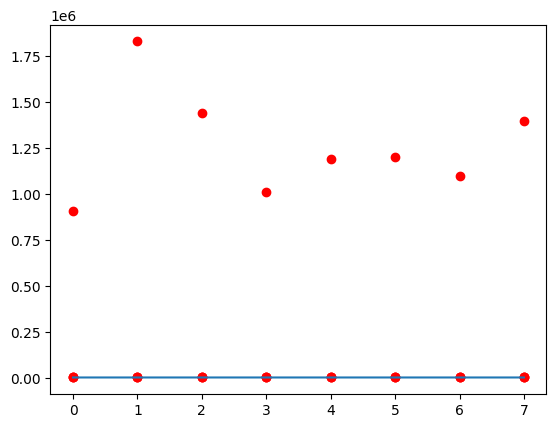

In [33]:
xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])

x_train = xy[:, 0:-1]
y_train = xy[:, [-1]]

plt.plot(x_train, 'ro')
plt.plot(y_train)
plt.show()


In [34]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train))

* W와 b은 학습을 통해 생성되는 모델에 쓰이는 Wegith와 Bias (초기값을 variable : 0이나 Random값으로 가능 tf.random_normal([3, 3],tf.zeros([3,3]) )

In [35]:
W = tf.Variable(tf.random.normal((4, 1)), dtype=tf.float32)
b = tf.Variable(tf.random.normal((1,)), dtype=tf.float32)

* Linear Regression의 Hyphthesis를 정의한다 

In [36]:
def linearReg_fn(features):
    hypothesis = tf.matmul(features, W) + b
    return hypothesis

* 가설을 검증할 Cost 함수를 정의합니다(Mean Square Error를 사용)

In [37]:
def loss_fn(hypothesis, features, labels):
    cost = tf.reduce_mean(tf.square(hypothesis - labels))
    return cost

* GradientDescentOptimizer로 학습 실행

In [38]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-5)

def grad(hypothesis, features, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(linearReg_fn(features),features,labels)
    return tape.gradient(loss_value, [W,b]), loss_value

In [39]:
EPOCHS = 101

for step in range(EPOCHS):
    for features, labels  in dataset:
        features = tf.cast(features, tf.float32)
        labels = tf.cast(labels, tf.float32)
        hypo_value = linearReg_fn(features)
        grads, loss_value = grad(linearReg_fn(features), features, labels)        
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W,b]))    
    print("Iter: {}, Loss: {:.4f}, Prediction: {}".format(step, loss_value, hypo_value))

Iter: 0, Loss: 799135563776.0000, Prediction: [[ -630210.25]
 [-1268059.  ]
 [ -997662.7 ]
 [ -699532.7 ]
 [ -824332.6 ]
 [ -831263.94]
 [ -761927.5 ]
 [ -969918.6 ]]
Iter: 1, Loss: 877994403772260496758013952.0000, Prediction: [[2.0901486e+13]
 [4.2076838e+13]
 [3.3100329e+13]
 [2.3203154e+13]
 [2.7346157e+13]
 [2.7576324e+13]
 [2.5274656e+13]
 [3.2179659e+13]]
Iter: 2, Loss: inf, Prediction: [[-6.9280801e+20]
 [-1.3946936e+21]
 [-1.0971551e+21]
 [-7.6909983e+20]
 [-9.0642535e+20]
 [-9.1405445e+20]
 [-8.3776256e+20]
 [-1.0666383e+21]]
Iter: 3, Loss: inf, Prediction: [[2.2964054e+28]
 [4.6229002e+28]
 [3.6366685e+28]
 [2.5492853e+28]
 [3.0044690e+28]
 [3.0297570e+28]
 [2.7768771e+28]
 [3.5355165e+28]]
Iter: 4, Loss: inf, Prediction: [[-7.61174589e+35]
 [-1.53232242e+36]
 [-1.20542282e+36]
 [-8.44994974e+35]
 [-9.95871778e+35]
 [-1.00425380e+36]
 [-9.20433336e+35]
 [-1.17189465e+36]]
Iter: 5, Loss: inf, Prediction: [[inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]]
Iter: 6, Loss: 

# Lab 07-3 linear regression - Eager (normalization, decay, l2_loss)

* linear regression에 Normalization, Learning Decay, L2_loss를 적용

### @Overfitting & Underfitting
- Overfitting이란 말그대로 AI가 훈련 데이터에 과도하게 학습된 결과를 말하며, Model Capacity가 높을수록 발생할 확률이 증가한다. (Model Capacity: 모델의 복잡성 정도)
  - 문제점: train에 대한 validation의 accuracy에 비해 test에선 accuracy가 낮아진다.
  - 해결방법: Feature Normalization, Regularization, Dropout, Batch Normalization, 더 많은 데이터 확보, Model Capacity 축소, 교차 검증(Cross Validation)
- Underfitting이란 Overfitting과 반대로 가지고 있는 train data에 대한 학습이 부족하여 accuracy가 낮은 상황을 말한다.

### Normalization function

In [40]:
def normalization(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    return numerator / denominator

* X Data(feature)의 값은 해당 배열의 첫번째 값부터 4번째 값까지로 정의 되고 Y Data(label)는 해당 배열의 마지막 값을 정의(5번째 값)

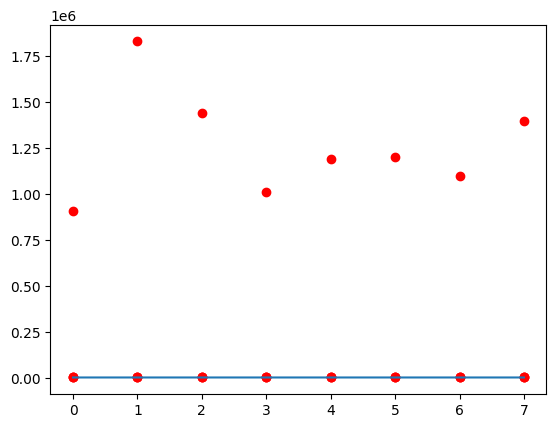

In [41]:
xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])

x_train = xy[:, 0:-1]
y_train = xy[:, [-1]]

plt.plot(x_train, 'ro')
plt.plot(y_train)
plt.show()


- 정규화 적용 시

[[1.         1.         0.         1.         1.        ]
 [0.70548491 0.70439552 1.         0.71881783 0.83755792]
 [0.54412549 0.50274824 0.57608696 0.60646801 0.6606331 ]
 [0.33890353 0.31368023 0.10869565 0.45989134 0.43800918]
 [0.51436    0.4258239  0.30434783 0.58504805 0.42624401]
 [0.49556179 0.4258239  0.31521739 0.48131134 0.49276137]
 [0.11436064 0.         0.20652174 0.22007776 0.18597238]
 [0.         0.07747099 0.5326087  0.         0.        ]]


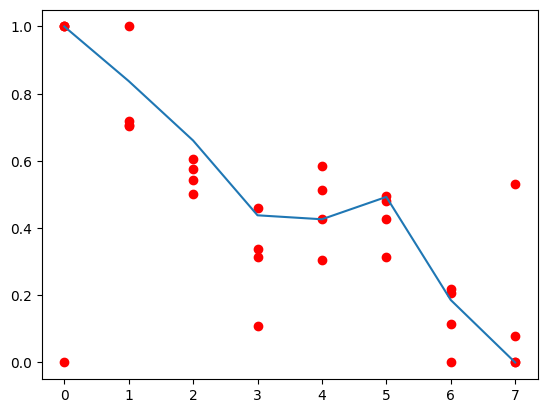

In [42]:
xy = normalization(xy)
print(xy)
x_train = xy[:, 0:-1]
y_train = xy[:, [-1]]

plt.plot(x_train, 'ro')
plt.plot(y_train)

plt.show()

* Tensorflow data API를 통해 학습시킬 값들을 담는다 (Batch Size는 한번에 학습시킬 Size로 정한다)
* X(features),Y(labels)는 실재 학습에 쓰일 Data (연산을 위해 Type를 맞춰준다)

In [43]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train))

* W와 b은 학습을 통해 생성되는 모델에 쓰이는 Wegith와 Bias (초기값을 variable : 0이나 Random값으로 가능 tf.random_normal / tf.zeros)

In [44]:
W = tf.Variable(tf.random.normal((4, 1)), dtype=tf.float32)
b = tf.Variable(tf.random.normal((1,)), dtype=tf.float32)

* Linear Regression의 Hyphthesis를 정의한다 (y=Wx+b)

In [45]:
def linearReg_fn(features):
    hypothesis = tf.matmul(features, W) + b
    return hypothesis

### @L1 loss, L2 loss
- **L1 loss** (MAE): Least Absolute Deviations (LAD)라고도 부르며, 다음과 같이 오차에 절댓값을 취하여 Loss를 구한다.
\begin{equation}
L = \sum^{n}_{i=1}\vert y_i-f(x_i)\vert
\end{equation}
- **L2 loss** (MSE): Least Square Error (LSE)라고도 부르며, 오차를 제곱한 값들을 모두 합하여 loss를 구한다.
\begin{equation}
L = \sum^{n}_{i=1} (y_i-f(x_i))^2
\end{equation}
- 둘은 다음과 같은 차이점을 가진다.
  1. Robustness (강건함)
     - outlier로 인해 loss가 **변하지 않는**(강건한) 정도를 의미한다.
     - L1가 L2에 비해 outlier로 인한 변화 정도가 적으며 Robustness가 크다.
  3. Stability
     - 모델이 비슷한 데이터에 대해 일관적으로 예측하는 정도를 의미한다.
     - 추가로 들어온 데이터가 Outlier가 아닌 현재 데이터와 비슷한 경향성을 가진 데이터라고 볼 수 있을 때, L1가 L2에 비해 변화가 크다.

### @Regularization
- Overfitting되지 않도록 모델을 구성하는 기울기 또는 계수(weight)에 정규화 요소(Regularization Term)을 더해주는 작업이다. 아래 식에서 $\lambda$는 정규화 요소의 계수이며 0에 가까울 수록 정규화 효과는 감소한다.
- L1 Regularization
\begin{equation}
cost(W,b) = {1 \over m}\sum^{m}_{i}L(\hat{y_i},y_i) + \lambda\vert w\vert
\end{equation}
- L2 Regularization
\begin{equation}
cost(W,b) = {1 \over m}\sum^{m}_{i}L(\hat{y_i},y_i) + \lambda w^2
\end{equation}
- 더 나아가, L1 Regularization을 사용하는 선형 회귀 모델을 **Lasso Model**이라고 하며, L2 Regularization을 사용하는 선형 회귀 모델을 Ridge 모델이라고 한다.

* Weight의 수가 많아지면 수만큼 더한다 tf.nn.l2_loss(W2) + tf.nn.l2_loss(W3)

In [46]:
def l2_loss(loss, beta = 0.01):
    W_reg = tf.nn.l2_loss(W) # output = sum(t ** 2) / 2
    loss = tf.reduce_mean(loss + W_reg * beta)
    return loss

- Cost 함수 정의

In [47]:
def loss_fn(hypothesis, features, labels, flag = False):
    cost = tf.reduce_mean(tf.square(hypothesis - labels))
    if(flag):
        cost = l2_loss(cost)
    return cost

### Learning Rate 값을 조정하기 위한 Learning Decay 설정 
#### 5개 파라미터 설정
* starter_learning_rate : 최초 학습시 사용될 learning rate (0.1로 설정하여 0.96씩 감소하는지 확인)
* global_step : 현재 학습 횟수
* 1000 : 곱할 횟수 정의 (1000번에 마다 적용)
* 0.96 : 기존 learning에 곱할 값
* 적용유무 decayed_learning_rate = learning_rate * decay_rate ^ (global_step / decay_steps)
* decayed_learning_rate = learning_rate * decay_rate ^ (global_step / decay_steps)

In [48]:
is_decay = True
starter_learning_rate = 0.1

if(is_decay):    
    learning_rate = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=starter_learning_rate,
                                                                  decay_steps=50,
                                                                  decay_rate=0.96,
                                                                  staircase=True)
    optimizer = tf.keras.optimizers.SGD(learning_rate)
else:
    optimizer = tf.keras.optimizers.SGD(learning_rate=starter_learning_rate)

def grad(hypothesis, features, labels, l2_flag):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(linearReg_fn(features),features,labels, l2_flag)
    return tape.gradient(loss_value, [W,b]), loss_value

### 학습 진행

In [49]:
EPOCHS = 101

for step in range(EPOCHS):
    for features, labels  in dataset:
        features = tf.cast(features, tf.float32)
        labels = tf.cast(labels, tf.float32)
        grads, loss_value = grad(linearReg_fn(features), features, labels, False)
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W,b]))        
    if step % 10 == 0:
        print("Iter: {}, Loss: {:.4f}".format(step, loss_value))

Iter: 0, Loss: 1.3035
Iter: 10, Loss: 0.1873
Iter: 20, Loss: 0.0979
Iter: 30, Loss: 0.0522
Iter: 40, Loss: 0.0286
Iter: 50, Loss: 0.0165
Iter: 60, Loss: 0.0103
Iter: 70, Loss: 0.0070
Iter: 80, Loss: 0.0053
Iter: 90, Loss: 0.0043
Iter: 100, Loss: 0.0037


### @Learning: Online vs Batch(Offline)
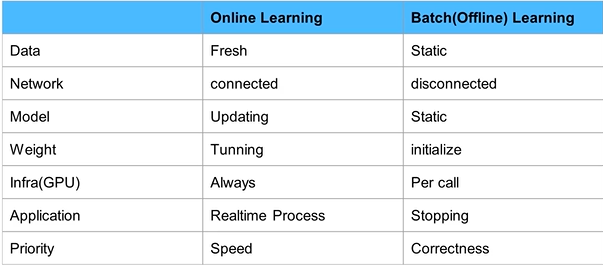

### @Fine tuning & Feature Extraction
- Fine tunning: 미세한 조정을 통해 더 나은 결과를 도출하는 과정을 말하며, '제안서를 파인 튜닝해서 다시 제출하라'처럼 범용적으로 불린다. 특히, AI를 Fine tunning한다는 것은 추가 데이터를 학습시킴으로써 사전 학습된 파라미터 등을 업데이트 시키는 작업을 말한다.

- Feature Extraction: 데이터들이 어떤 특징을 가지고 있는지 찾아내고 그 결과를 벡터로 변환하는 작업을 말한다. Feature Extraction은 분류 또는 군집 분석 시 불필요한 정보를 제거하고 핵심적인 정보를 추출하거나, 차원 축소를 통해 계산량을 줄임으로써 분석 효율과 성능을 향상시킬 수 있다.
 
- 강의에선 다음과 같이 Feature Extraction을 Fine tuning과 비슷한 의미로 해석하였는데, 정확하지 않은 내용으로 보여진다.

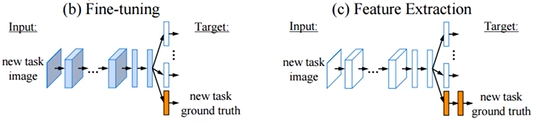

# Lab 07-4 MNIST introduction
* MNIST(Modified National Institute of Standards and Technology database)는 0~9까지의 손으로 쓴 숫자들로 이루어진 대형 데이터베이스

In [50]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

###  Tensorflow Keras
* Tensorflow keras API를 통해 모델에 대한 정의

In [51]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

* Adam Optimizer과 Cross Entropy Loss 선언

In [52]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

* 5 Epoch로 학습할 Data로 학습 수행

In [53]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 37s 19ms/step - loss: 0.2166 - accuracy: 0.9348
Epoch 2/5
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0958 - accuracy: 0.9711
Epoch 3/5
1875/1875 [==============================] - 71s 38ms/step - loss: 0.0683 - accuracy: 0.9790
Epoch 4/5
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0520 - accuracy: 0.9832
Epoch 5/5
1875/1875 [==============================] - 65s 35ms/step - loss: 0.0428 - accuracy: 0.9863


* 모델을 평가할 Test 데이타에 대한 정의

In [54]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 4s 10ms/step - loss: 0.0640 - accuracy: 0.9815


[0.0639536902308464, 0.9815000295639038]

# Lab 07-5 Fashion MNIST introduction

* Tensorflow 2.0 버전에 맞게 Keras를 활용한 Fashion MNIST를 분류 모델 생성

## 학습에 쓰이는 Data
| Label | Class       
| :------------- | :----------: 
| 0     | T-shirt/top 
| 1 | Trouser 
| 2 | Pullover 
| 3 | Dress
| 4 | Coat
| 5 | Sandal
| 6 | Shirt
| 7 | Sneaker
| 8 | Bag
| 9 | Ankle boot

In [55]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4422102/4422102 [==============================] - 0s 0us/step


*  Fashion MNIST Data 확인 - 4번째 배열 드레스

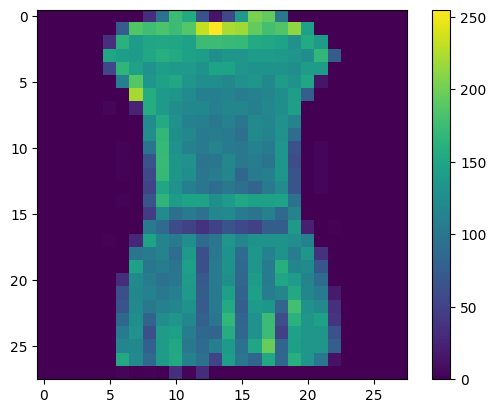

In [56]:
plt.figure()
plt.imshow(train_images[3])
plt.colorbar()
plt.grid(False)

###  Tensorflow Keras
* 0~1사이의 값으로 정규화 및 Data 출력

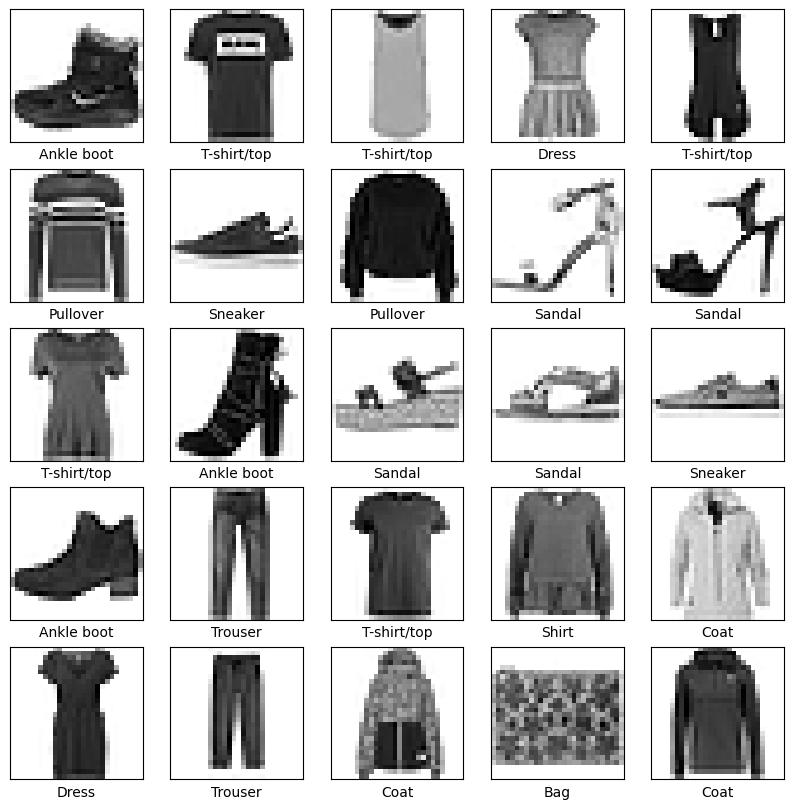

In [57]:
train_images = train_images / 255.0
test_images = test_images / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

* Tensorflow keras API를 통해 모델에 대한 정의


In [59]:
from tensorflow import keras

In [60]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

* Adam Optimizer과 Cross Entropy Loss 선언
* 5 Epoch로 학습할 Data로 학습 수행

In [61]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4988 - accuracy: 0.8248
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3706 - accuracy: 0.8666
Epoch 3/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3342 - accuracy: 0.8789
Epoch 4/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3087 - accuracy: 0.8877
Epoch 5/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2912 - accuracy: 0.8920


* 모델을 평가할 Test 데이타에 대한 정의

In [62]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 4s 9ms/step - loss: 0.3583 - accuracy: 0.8760
Test accuracy: 0.8759999871253967


# Lab 07-6-IMDB-introduction
- https://www.tensorflow.org/tutorials/keras/text_classification?hl=ko

* Tensorflow 2.0 버전에 맞게 Keras를 활용한 IMDB 분류 모델 생성

## 학습에 쓰이는 Data
* 50,000 movie reviews from the Internet Movie Database. (10000개의 빈도수가 높은 단어를 학습시 Vector에 사용)

In [63]:
imdb = keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))
print(train_data[0])

17464789/17464789 [==============================] - 1s 0us/step
Training entries: 25000, labels: 25000
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 447

*  IMDB Data를 Vector을 실제값으로 변환하여 출력

In [64]:
# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

decode_review(train_data[4])

1641221/1641221 [==============================] - 0s 0us/step


"<START> worst mistake of my life br br i picked this movie up at target for 5 because i figured hey it's sandler i can get some cheap laughs i was wrong completely wrong mid way through the film all three of my friends were asleep and i was still suffering worst plot worst script worst movie i have ever seen i wanted to hit my head up against a wall for an hour then i'd stop and you know why because it felt damn good upon bashing my head in i stuck that damn movie in the <UNK> and watched it burn and that felt better than anything else i've ever done it took american psycho army of darkness and kill bill just to get over that crap i hate you sandler for actually going through with this and ruining a whole day of my life"

In [65]:
print(train_labels[4])

0


###  Tensorflow Keras
* 학습과 평가를 위해 동일길이인 256길이의 단어로 PAD값을 주어 맞춰줌 (뒤의 길이는 0값으로 맞춰줌)

In [66]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

print(len(train_data[0]), len(test_data[0]))
print(train_data[0])

256 256
[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  10

* Tensorflow keras API를 통해 모델에 대한 정의
* 입력 Size와 학습시킬 Layer의 크기와 Activation Function 정의

In [67]:
# input shape is the vocabulary count used for the movie reviews (10,000 words)
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          160000    
                                                                 
 global_average_pooling1d (  (None, 16)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160289 (626.13 KB)
Trainable params: 160289 (626.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Adam Optimizer과 Cross Entropy Loss 선언

In [68]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

* 모델을 평가할 Test 데이타에 대한 정의(10000을 기준으로 학습과 평가 수행)

In [69]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/40
30/30 [==============================] - 2s 34ms/step - loss: 0.6919 - accuracy: 0.5387 - val_loss: 0.6898 - val_accuracy: 0.7290
Epoch 2/40
30/30 [==============================] - 1s 32ms/step - loss: 0.6855 - accuracy: 0.7360 - val_loss: 0.6803 - val_accuracy: 0.6953
Epoch 3/40
30/30 [==============================] - 3s 87ms/step - loss: 0.6711 - accuracy: 0.7486 - val_loss: 0.6623 - val_accuracy: 0.7186
Epoch 4/40
30/30 [==============================] - 3s 98ms/step - loss: 0.6463 - accuracy: 0.7622 - val_loss: 0.6342 - val_accuracy: 0.7732
Epoch 5/40
30/30 [==============================] - 3s 94ms/step - loss: 0.6105 - accuracy: 0.7919 - val_loss: 0.5969 - val_accuracy: 0.7774
Epoch 6/40
30/30 [==============================] - 3s 90ms/step - loss: 0.5666 - accuracy: 0.8137 - val_loss: 0.5553 - val_accuracy: 0.8072
Epoch 7/40
30/30 [==============================] - 3s 92ms/step - loss: 0.5185 - accuracy: 0.8319 - val_loss: 0.5114 - val_accuracy: 0.8221
Epoch 8/40
30

In [70]:
results = model.evaluate(test_data, test_labels)
print(results)

782/782 [==============================] - 8s 11ms/step - loss: 0.3303 - accuracy: 0.8722
[0.33030420541763306, 0.8722400069236755]


# 더 알아보기: Decorator
- 함수의 기능을 변경

### First class function

In [71]:
def calculate(x):
    def plus(y):
        return x+y
    return plus

In [75]:
cal_ = calculate(3)
cal_

<function __main__.calculate.<locals>.plus(y)>

In [76]:
cal_(4)

7

In [91]:
'__closure__' in dir(cal_), type(cal_.__closure__)

(True, tuple)

In [90]:
cal_.__closure__[0].cell_contents

3

### 함수에 동적으로 값 추가 가능

In [32]:
def x():
    return 1

In [33]:
x.a = 1
x.a

1

### closure (remind)
- 함수형 프로그래밍을 객체지향 프로그래밍으로 구현
- 인자를 내부 함수에 전달

In [34]:
def x(m):
    def y(n):
        return m+n
    return y

xx = x(3)
xx(4)

7

In [35]:
class A:
    def __init__(self, x):
        self.x = x
    def __call__(self, y):
        return self.x + y
A(3)(4)

7

### decorator 구현
- function closure == decorator
- 기능 추가

In [119]:
def deco(fn):
    def deco_(n):
        print("it's decorator.")
        return fn()*n
    return deco_

In [113]:
def hi():
    return 'hi'

In [118]:
deco(hi)(3)

it's decorator.


'hihihi'

In [107]:
@deco
def hi():
    return 'hi'

In [109]:
hi(3)

it's decorator.


'hihihi'

In [120]:
@deco
def hello():
    return 'hello'

In [121]:
@deco
def no():
    return 'no'

In [124]:
hello(2)

it's decorator.


'hellohello'

In [125]:
no(4)

it's decorator.


'nononono'

In [36]:
def x(fn): # 함수를 인자로 받음
    def y():
        print('-------')
        return fn()
    return y

In [38]:
@x
def yy():
    return 1

In [39]:
yy()

-------


1

In [40]:
x(yy)()

-------
-------


1

In [42]:
@x
def zz(x):
    return x
zz(3)

TypeError: x.<locals>.y() takes 0 positional arguments but 1 was given

In [44]:
def x(fn): # 함수를 인자로 받음
    def y(t):
        print('-------')
        return fn(t)
    return y
@x
def zz(x):
    return x
zz(3)

-------


3

In [46]:
@x
def yy():
    return 1
yy()

TypeError: x.<locals>.y() missing 1 required positional argument: 't'

In [60]:
def x(fn): # 함수를 인자로 받음
    def y(*args, **kwargs):
        print('-------')
        return fn(*args, **kwargs)
    return y # print(~), zz
@x
def zz(x):
    return x

@x
def yy():
    return 1
zz(3), yy()

-------
-------


(3, 1)

In [126]:
from functools import wraps

In [127]:
def x(fn): # 함수를 인자로 받음
    @wraps(fn)
    def y(*args, **kwargs):
        print('-------')
        return fn(*args, **kwargs)
    return y

In [129]:
@x
def zz(x):
    return x
@x
def yy():
    return 1
yy()

-------


1

In [130]:
zz(2)

-------


2

### 이중 decorator

In [ ]:
@decorator2
@decorator1
def foo():
    print('foo')